## AdaBoost
AdaBoost是adaptive boosting（自适应boosting）的缩写，其运行过程如下：训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量D。一开始，这些权重都初始化成相等值，首先在训练数据上训练出一个弱分类器并计算该分类器的错误率，然后在同一数据集上再次训练弱分类器。在分类器的第二次训练当中，将会重新调整每个样本的权重，其中第一次分对的样本的权重将会降低，而第一次分错的样本的权重将会提高。为了从所有弱分类器中得到最终的分类结果，AdaBoost为每个分类器都分配了一个权重值alpha，这些alpha值是基于每个弱分类器的错误率epsilon进行计算的。


$$
\alpha = \frac{1}{2}\ln {(\frac{1-\epsilon}{\epsilon})}
$$

计算出alpha后，可以对权重向量D进行更新，以使得那些正确分类的样本的权重降低而错分样本的权重升高。

如果某个样本被正确分类，那么样本的权重更改为:
$$
D_i^{(i+1)} = \frac{D_i^{(t)}e^{-\alpha}}{Sum(D)}
$$

如果某个样本被分错，那么样本的权重更改为:
$$
D_i^{(i+1)} = \frac{D_i^{(t)}e^{\alpha}}{Sum(D)}
$$

计算出D之后，AdaBoost进入下一轮迭代，直到训练错误率为0或者弱分类器的数目达到用户的指定值。


### 基于单层决策树构建弱分类器
* 第一个函数将用于测试是否有某个值小于或者大于我们正在测试的阈值
* 第二个函数在一个加权数据集中循环，并找到具有最低错误率的单层决策树

In [1]:
from numpy import *
def loadSimpData():
    dataMat = matrix([[1., 2.1], [1.5, 1.6], [1.3, 1.], [1., 1.], [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return dataMat,classLabels

In [2]:
datMat, classLabesl = loadSimpData()

In [3]:
#通过阈值比较对数据进行分类
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArry = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArry[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArry[dataMatrix[:,dimen] > threshVal] = 1.0
    return retArry

In [4]:
#将最小错误率minError设为+∞
#对数据集中的每一个特征（第一层循环）：
    #对每个步长（第二层循环）：
        #对每个不等号（第三层循环）：
            #建立一颗单层决策树并利用加权数据集对它进行测试
            #如果错误率低于minError，则将当前单层决策树设为最佳单层决策树
#返回最佳单层决策树

In [5]:
#遍历stumpClassify()函数所有的可能输入值，并找到数据集上的最佳单层决策树
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']:  # 大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)  # 计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)  # 计算分类结果
                errArr = mat(ones((m, 1)))  # 初始化误差矩阵
                errArr[predictedVals == labelMat] = 0  # 分类正确的,赋值为0
                weightedError = D.T * errArr  # 计算误差
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (
                i, threshVal, inequal, weightedError))
                if weightedError < minError:  # 找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [6]:
D = mat(ones((5,1))/5)
buildStump(datMat, classLabesl, D)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

___上述单层决策树的生成函数是决策树的一个简化版本，它就是所谓的弱学习器，即弱分类算法___


### 完整AdaBoost算法

In [7]:
#对每次迭代：
    #利用buildStump()函数找到最佳的单层决策树
    #将最佳单层决策树加入到单层决策树数组
    #计算alpha
    #计算新的权重向量D
    #更新累计类别估计值
    #如果错误率等于0.0，则退出循环

In [8]:
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1)) / m)  # 初始化权重
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)  # 构建单层决策树
        print("D:", D.T)
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))  # 计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
                                        #max(error, le-16)用于确保在没有错误时不会发生除零溢出
        bestStump['alpha'] = alpha  # 存储权重
        weakClassArr.append(bestStump)  # 存储单层决策树
        print("classEst: ", classEst.T)
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)  # 计算e的指数项
        D = multiply(D, exp(expon))
        D = D / D.sum()  # 根据样本权重公式，更新样本权重
        # 计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst
        print("aggClassEst: ", aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))  # 计算误差
        errorRate = aggErrors.sum() / m
        print("total error: ", errorRate)
        if errorRate == 0.0: break  # 误差为0，退出循环
    return weakClassArr, aggClassEst

In [9]:
classifierArray = adaBoostTrainDS(datMat, classLabesl,9)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

在第一轮迭代中，D中的所有值都相等。于是，只有第一个数据点被错分了。因此在第二轮迭代中，D向量给第一个数据点0.5的权重。这就可以通过变量aggClassEst的符号来了解总的类别。第二次迭代之后，我们就会发现第一个数据点已经正确分类了，但此时最后一个数据点却是错分了。D向量中的最后一个元素变为0.5，而D向量中的其他值都变得非常小。最后，第三次迭代之后aggClassEst所有值的符号和真是类别标签都完全吻合，那么训练错误率为0，程序终止运行。

### 测试算法：基于AdaBoost的分类

In [10]:
#利用训练出的分类器进行分类
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [11]:
weakClassArr, aggClassEst = adaBoostTrainDS(datMat, classLabesl)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

In [12]:
adaClassify([[0,0],[5,5]], weakClassArr)

[[-0.69314718]
 [ 0.69314718]]
[[-1.66610226]
 [ 1.66610226]]
[[-2.56198199]
 [ 2.56198199]]


matrix([[-1.],
        [ 1.]])

### 马疝病数据集上应用AdaBoost分类器

In [13]:
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = [];
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [14]:
dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
weak, agg = adaBoostTrainDS(dataArr, LabelArr)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.405
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.425
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.425
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.425
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.682
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.682
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.682
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.405
split: dim 8, thresh 2.10, thresh ineq

D: [[0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.00334448 0.00334448

split: dim 6, thresh 0.00, thresh ineqal: lt, the weighted error is 0.483
split: dim 6, thresh 0.00, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 0.40, thresh ineqal: lt, the weighted error is 0.483
split: dim 6, thresh 0.40, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 0.80, thresh ineqal: lt, the weighted error is 0.483
split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.652
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.652
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.651
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 2.40, thresh ineqal: lt, the weighted error is 0.651
split: dim 6, thresh 2.40, thresh ineq

classEst:  [[ 1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.
   1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
   1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
  -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.
   1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.
   1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.
  -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
   1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.
   1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1.  1.  1.  1. -1. -1. -

split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.444
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.463
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.528
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.638
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.681
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.631
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.457
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.579
split: dim 1

split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.558
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.554
split: dim 14, thresh 2.25, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 3.00, thresh ineqal: lt, the weighted error is 0.562
split: dim 14, thresh 3.00, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 3.75, thresh ineqal: lt, the weighted error is 0.558
split: dim 14, thresh 3.75, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 4.50, thresh ineqal: lt, the weighted error is 0.532
split: dim 14, thresh 4.50, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 5.25, thresh ineqal: lt, the weighted error is 0.528
split: dim 14, thresh 5.25, thresh ineqal: gt, the weighted error is 0.512
split: dim 14, thresh 6.0

split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.60, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.60, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.80, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.80, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is 0.469
split: dim 0, thresh 2.00, thresh ineq

split: dim 8, thresh 0.00, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.646
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.646
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.469
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.646
split: dim 8, thresh 1.80, thresh ineq

  -0.06051508  0.1848801   0.16735926 -0.37390739  0.48075157]]
total error:  0.3511705685618729
split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.482
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.482
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.482
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.482
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.482
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, t

split: dim 10, thresh 4.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 10, thresh 4.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.505
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.505
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.596
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.596
split: dim 11, thresh 1

split: dim 19, thresh -0.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 19, thresh -0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 0.00, thresh ineqal: lt, the weighted error is 0.552
split: dim 19, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 0.30, thresh ineqal: lt, the weighted error is 0.552
split: dim 19, thresh 0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 0.60, thresh ineqal: lt, the weighted error is 0.552
split: dim 19, thresh 0.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 0.90, thresh ineqal: lt, the weighted error is 0.552
split: dim 19, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 1.20, thresh ineqal: lt, the weighted error is 0.584
split: dim 19, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 19, thresh 1.50, thresh ineqal: lt, the weighted error is 0.584
split: dim 19, thresh 1

split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.521
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 2.10, thresh ineqal: lt, the weighted error is 0.504
split: dim 8, thresh 2.10, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 2.40, thresh ineqal: lt, the weighted error is 0.504
split: dim 8, thresh 2.40, thresh ineqal: gt, the weighted error is 0.496
split: dim 8, thresh 2.70, thresh ineq

split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.524
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.566
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.650
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.668
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.603
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.544
split: dim 17, thresh 67.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 1

split: dim 1, thresh 1.80, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 1.80, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 2.60, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 2.60, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 3.40, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 3.40, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 4.20, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 4.20, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 5.00, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 5.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 5.80, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 5.80, thresh ineqal: gt, the weighted error is 0.491
split: dim 1, thresh 6.60, thresh ineqal: lt, the weighted error is 0.519
split: dim 1, thresh 6.60, thresh ineq

split: dim 9, thresh 5.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh -0.40, thresh ineqal: lt, the weighted error is 0.491
split: dim 10, thresh -0.40, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 0.00, thresh ineqal: lt, the weighted error is 0.489
split: dim 10, thresh 0.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 0.40, thresh ineqal: lt, the weighted error is 0.489
split: dim 10, thresh 0.40, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 0.80, thresh ineqal: lt, the weighted error is 0.489
split: dim 10, thresh 0.80, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 1.20, thresh ineqal: lt, the weighted error is 0.539
split: dim 10, thresh 1.20, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 1.60, thresh ineqal: lt, the weighted error is 0.539
split: dim 10, thresh 1.60, thresh ineqal: gt, the weighted error is 0.491
split: dim 10, thresh 2.

split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 8.16, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 12.24, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 16.32, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 16.32, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 20.40, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.517
split: dim 2, thresh 28.56, thresh ineqal: gt, the weighted error is 0.482
split: dim 2, thresh 32.64, 

split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.496
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.515
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.561
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.652
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.675
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.482
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.615
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.482
split: dim 1

split: dim 13, thresh 2.70, thresh ineqal: lt, the weighted error is 0.566
split: dim 13, thresh 2.70, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 3.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh -0.75, thresh ineqal: lt, the weighted error is 0.500
split: dim 14, thresh -0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.00, thresh ineqal: lt, the weighted error is 0.576
split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.576
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.566
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.554
split: dim 14, thresh 2

split: dim 18, thresh 35.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 44.50, thresh ineqal: lt, the weighted error is 0.493
split: dim 18, thresh 44.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 53.40, thresh ineqal: lt, the weighted error is 0.490
split: dim 18, thresh 53.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 62.30, thresh ineqal: lt, the weighted error is 0.491
split: dim 18, thresh 62.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 71.20, thresh ineqal: lt, the weighted error is 0.514
split: dim 18, thresh 71.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 80.10, thresh ineqal: lt, the weighted error is 0.523
split: dim 18, thresh 80.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 89.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 89.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 1

split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.499
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.499
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.597
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.597
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.652
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.652
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.483
split: dim 11, thresh 2.8

split: dim 20, thresh 1.01, thresh ineqal: lt, the weighted error is 0.587
split: dim 20, thresh 1.01, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 2.02, thresh ineqal: lt, the weighted error is 0.556
split: dim 20, thresh 2.02, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 3.03, thresh ineqal: lt, the weighted error is 0.550
split: dim 20, thresh 3.03, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 4.04, thresh ineqal: lt, the weighted error is 0.532
split: dim 20, thresh 4.04, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 5.05, thresh ineqal: lt, the weighted error is 0.523
split: dim 20, thresh 5.05, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 6.06, thresh ineqal: lt, the weighted error is 0.515
split: dim 20, thresh 6.06, thresh ineqal: gt, the weighted error is 0.483
split: dim 20, thresh 7.07, thresh ineqal: lt, the weighted error is 0.527
split: dim 20, thresh 7.0

split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.555
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.608
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.608
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.608
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.10, thresh ineqal: lt, the weighted error is 0.566
split: dim 13, thresh 2.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.40, thresh ineqal: lt, the weighted error is 0.566
split: dim 13, thresh 2.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.70, thresh ineqal: lt, the weighted error is 0.566
split: dim 13, thresh 2.7

split: dim 18, thresh 8.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 17.80, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 17.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 26.70, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 26.70, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 35.60, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 35.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 44.50, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 44.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 53.40, thresh ineqal: lt, the weighted error is 0.490
split: dim 18, thresh 53.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 62.30, thresh ineqal: lt, the weighted error is 0.491
split: dim 18, thresh 62.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 18

split: dim 5, thresh 3.20, thresh ineqal: lt, the weighted error is 0.540
split: dim 5, thresh 3.20, thresh ineqal: gt, the weighted error is 0.487
split: dim 5, thresh 3.60, thresh ineqal: lt, the weighted error is 0.540
split: dim 5, thresh 3.60, thresh ineqal: gt, the weighted error is 0.487
split: dim 5, thresh 4.00, thresh ineqal: lt, the weighted error is 0.513
split: dim 5, thresh 4.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 6, thresh -0.40, thresh ineqal: lt, the weighted error is 0.487
split: dim 6, thresh -0.40, thresh ineqal: gt, the weighted error is 0.487
split: dim 6, thresh 0.00, thresh ineqal: lt, the weighted error is 0.503
split: dim 6, thresh 0.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 6, thresh 0.40, thresh ineqal: lt, the weighted error is 0.503
split: dim 6, thresh 0.40, thresh ineqal: gt, the weighted error is 0.487
split: dim 6, thresh 0.80, thresh ineqal: lt, the weighted error is 0.503
split: dim 6, thresh 0.80, thresh in

split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.651
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.651
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.487
split: dim 11, thresh 2.80, thresh ineqal: lt, the weighted error is 0.651
split: dim 11, thresh 2.80, thresh ineqal: gt, the weighted error is 0.487
split: dim 11, thresh 3.20, thresh ineqal: lt, the weighted error is 0.564
split: dim 11, thresh 3.20, thresh ineqal: gt, the weighted error is 0.487
split: dim 11, thresh 3.60, thresh ineqal: lt, the weighted error is 0.564
split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.487
split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.513
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.487
split: dim 12, thresh -0

split: dim 19, thresh 2.40, thresh ineqal: lt, the weighted error is 0.582
split: dim 19, thresh 2.40, thresh ineqal: gt, the weighted error is 0.487
split: dim 19, thresh 2.70, thresh ineqal: lt, the weighted error is 0.582
split: dim 19, thresh 2.70, thresh ineqal: gt, the weighted error is 0.487
split: dim 19, thresh 3.00, thresh ineqal: lt, the weighted error is 0.513
split: dim 19, thresh 3.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 20, thresh -1.01, thresh ineqal: lt, the weighted error is 0.487
split: dim 20, thresh -1.01, thresh ineqal: gt, the weighted error is 0.487
split: dim 20, thresh 0.00, thresh ineqal: lt, the weighted error is 0.581
split: dim 20, thresh 0.00, thresh ineqal: gt, the weighted error is 0.487
split: dim 20, thresh 1.01, thresh ineqal: lt, the weighted error is 0.585
split: dim 20, thresh 1.01, thresh ineqal: gt, the weighted error is 0.487
split: dim 20, thresh 2.02, thresh ineqal: lt, the weighted error is 0.553
split: dim 20, thresh 2

split: dim 9, thresh -0.50, thresh ineqal: lt, the weighted error is 0.491
split: dim 9, thresh -0.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 0.00, thresh ineqal: lt, the weighted error is 0.531
split: dim 9, thresh 0.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 0.50, thresh ineqal: lt, the weighted error is 0.531
split: dim 9, thresh 0.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 1.00, thresh ineqal: lt, the weighted error is 0.595
split: dim 9, thresh 1.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.595
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.562
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.562
split: dim 9, thresh 2.50, thresh in

split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.593
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.593
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.509
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.491
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.491
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.505
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.491
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 17, thresh 

split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.530
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.530
split: dim 2, thresh 28.56, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 32.64, thresh ineqal: lt, the weighted error is 0.530
split: dim 2, thresh 32.64, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 36.72, thresh ineqal: lt, the weighted error is 0.523
split: dim 2, thresh 36.72, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 40.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 2, thresh 40.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh -18.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 3, thresh -18.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 0.

split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.610
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.610
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.10, thresh ineqal: lt, the weighted error is 0.565
split: dim 13, thresh 2.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.40, thresh ineqal: lt, the weighted error is 0.565
split: dim 13, thresh 2.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 2.70, thresh ineqal: lt, the weighted error is 0.565
split: dim 13, thresh 2.70, thresh ineqal: gt, the weighted error is 0.500
split: dim 13, thresh 3.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh -0.75, thresh ineqal: lt, the weighted error is 0.500
split: dim 14, thresh -0

split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.596
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.561
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.561
split: dim 9, thresh 2.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 3.00, thresh ineqal: lt, the weighted error is 0.647
split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.647
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.569
split: dim 9, thresh 4.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 4.50, thresh ineqal: lt, the weighted error is 0.569
split: dim 9, thresh 4.50, thresh ineq

split: dim 1, thresh 6.60, thresh ineqal: lt, the weighted error is 0.520
split: dim 1, thresh 6.60, thresh ineqal: gt, the weighted error is 0.492
split: dim 1, thresh 7.40, thresh ineqal: lt, the weighted error is 0.520
split: dim 1, thresh 7.40, thresh ineqal: gt, the weighted error is 0.492
split: dim 1, thresh 8.20, thresh ineqal: lt, the weighted error is 0.520
split: dim 1, thresh 8.20, thresh ineqal: gt, the weighted error is 0.492
split: dim 1, thresh 9.00, thresh ineqal: lt, the weighted error is 0.508
split: dim 1, thresh 9.00, thresh ineqal: gt, the weighted error is 0.492
split: dim 2, thresh -4.08, thresh ineqal: lt, the weighted error is 0.492
split: dim 2, thresh -4.08, thresh ineqal: gt, the weighted error is 0.492
split: dim 2, thresh 0.00, thresh ineqal: lt, the weighted error is 0.525
split: dim 2, thresh 0.00, thresh ineqal: gt, the weighted error is 0.492
split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.525
split: dim 2, thresh 4.08, thresh in

split: dim 12, thresh 3.00, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh -0.30, thresh ineqal: lt, the weighted error is 0.492
split: dim 13, thresh -0.30, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 0.00, thresh ineqal: lt, the weighted error is 0.555
split: dim 13, thresh 0.00, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 0.30, thresh ineqal: lt, the weighted error is 0.555
split: dim 13, thresh 0.30, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 0.60, thresh ineqal: lt, the weighted error is 0.555
split: dim 13, thresh 0.60, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.555
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.612
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.492
split: dim 13, thresh 1

split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.498
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.60, thresh ineq

split: dim 12, thresh 1.20, thresh ineqal: lt, the weighted error is 0.497
split: dim 12, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 1.50, thresh ineqal: lt, the weighted error is 0.497
split: dim 12, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 1.80, thresh ineqal: lt, the weighted error is 0.497
split: dim 12, thresh 1.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 2.10, thresh ineqal: lt, the weighted error is 0.505
split: dim 12, thresh 2.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 2.40, thresh ineqal: lt, the weighted error is 0.505
split: dim 12, thresh 2.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 2.70, thresh ineqal: lt, the weighted error is 0.505
split: dim 12, thresh 2.70, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 3.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 12, thresh 3.0

split: dim 5, thresh 0.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 0.40, thresh ineqal: lt, the weighted error is 0.510
split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.510
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 1.20, thresh ineqal: lt, the weighted error is 0.616
split: dim 5, thresh 1.20, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 1.60, thresh ineqal: lt, the weighted error is 0.616
split: dim 5, thresh 1.60, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 2.00, thresh ineqal: lt, the weighted error is 0.661
split: dim 5, thresh 2.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 2.40, thresh ineqal: lt, the weighted error is 0.661
split: dim 5, thresh 2.40, thresh ineqal: gt, the weighted error is 0.490
split: dim 5, thresh 2.80, thresh ineq

split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.490
split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.510
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.490
split: dim 12, thresh -0.30, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.523
split: dim 12, thresh 0.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh 0.30, thresh ineqal: lt, the weighted error is 0.523
split: dim 12, thresh 0.30, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh 0.60, thresh ineqal: lt, the weighted error is 0.523
split: dim 12, thresh 0.60, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh 0.90, thresh ineqal: lt, the weighted error is 0.523
split: dim 12, thresh 0.90, thresh ineqal: gt, the weighted error is 0.490
split: dim 12, thresh 1

split: dim 3, thresh 0.00, thresh ineqal: lt, the weighted error is 0.524
split: dim 3, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 18.40, thresh ineqal: lt, the weighted error is 0.524
split: dim 3, thresh 18.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 36.80, thresh ineqal: lt, the weighted error is 0.518
split: dim 3, thresh 36.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 55.20, thresh ineqal: lt, the weighted error is 0.671
split: dim 3, thresh 55.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 73.60, thresh ineqal: lt, the weighted error is 0.675
split: dim 3, thresh 73.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 92.00, thresh ineqal: lt, the weighted error is 0.572
split: dim 3, thresh 92.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 110.40, thresh ineqal: lt, the weighted error is 0.554
split: dim 3, thresh 110.4

split: dim 13, thresh 3.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh -0.75, thresh ineqal: lt, the weighted error is 0.500
split: dim 14, thresh -0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.00, thresh ineqal: lt, the weighted error is 0.575
split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.575
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.565
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.554
split: dim 14, thresh 2.25, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 3.00, thresh ineqal: lt, the weighted error is 0.564
split: dim 14, thresh 3

split: dim 3, thresh 92.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 110.40, thresh ineqal: lt, the weighted error is 0.560
split: dim 3, thresh 110.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 128.80, thresh ineqal: lt, the weighted error is 0.531
split: dim 3, thresh 128.80, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 147.20, thresh ineqal: lt, the weighted error is 0.521
split: dim 3, thresh 147.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 165.60, thresh ineqal: lt, the weighted error is 0.512
split: dim 3, thresh 165.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 184.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 3, thresh 184.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 4, thresh -9.60, thresh ineqal: lt, the weighted error is 0.493
split: dim 4, thresh -9.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 4, t

split: dim 13, thresh 2.70, thresh ineqal: lt, the weighted error is 0.570
split: dim 13, thresh 2.70, thresh ineqal: gt, the weighted error is 0.493
split: dim 13, thresh 3.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh -0.75, thresh ineqal: lt, the weighted error is 0.493
split: dim 14, thresh -0.75, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 0.00, thresh ineqal: lt, the weighted error is 0.579
split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.579
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.570
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.559
split: dim 14, thresh 2

split: dim 1, thresh 2.60, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 2.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 3.40, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 3.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 4.20, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 4.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 5.00, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 5.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 5.80, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 5.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 6.60, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 6.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 1, thresh 7.40, thresh ineqal: lt, the weighted error is 0.515
split: dim 1, thresh 7.40, thresh ineq

split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.598
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.560
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.560
split: dim 9, thresh 2.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 3.00, thresh ineqal: lt, the weighted error is 0.644
split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.644
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.564
split: dim 9, thresh 4.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 4.50, thresh ineqal: lt, the weighted error is 0.564
split: dim 9, thresh 4.50, thresh ineq

split: dim 20, thresh 2.02, thresh ineqal: lt, the weighted error is 0.544
split: dim 20, thresh 2.02, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 3.03, thresh ineqal: lt, the weighted error is 0.537
split: dim 20, thresh 3.03, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 4.04, thresh ineqal: lt, the weighted error is 0.518
split: dim 20, thresh 4.04, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 5.05, thresh ineqal: lt, the weighted error is 0.507
split: dim 20, thresh 5.05, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 6.06, thresh ineqal: lt, the weighted error is 0.499
split: dim 20, thresh 6.06, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 7.07, thresh ineqal: lt, the weighted error is 0.510
split: dim 20, thresh 7.07, thresh ineqal: gt, the weighted error is 0.500
split: dim 20, thresh 8.08, thresh ineqal: lt, the weighted error is 0.507
split: dim 20, thresh 8.0

split: dim 7, thresh -0.60, thresh ineqal: lt, the weighted error is 0.493
split: dim 7, thresh -0.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 0.00, thresh ineqal: lt, the weighted error is 0.523
split: dim 7, thresh 0.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 0.60, thresh ineqal: lt, the weighted error is 0.523
split: dim 7, thresh 0.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 1.20, thresh ineqal: lt, the weighted error is 0.638
split: dim 7, thresh 1.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 1.80, thresh ineqal: lt, the weighted error is 0.638
split: dim 7, thresh 1.80, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 2.40, thresh ineqal: lt, the weighted error is 0.647
split: dim 7, thresh 2.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 3.00, thresh ineqal: lt, the weighted error is 0.666
split: dim 7, thresh 3.00, thresh in

split: dim 14, thresh 4.50, thresh ineqal: lt, the weighted error is 0.542
split: dim 14, thresh 4.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 5.25, thresh ineqal: lt, the weighted error is 0.539
split: dim 14, thresh 5.25, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 6.00, thresh ineqal: lt, the weighted error is 0.537
split: dim 14, thresh 6.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 6.75, thresh ineqal: lt, the weighted error is 0.539
split: dim 14, thresh 6.75, thresh ineqal: gt, the weighted error is 0.493
split: dim 14, thresh 7.50, thresh ineqal: lt, the weighted error is 0.507
split: dim 14, thresh 7.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 15, thresh -0.40, thresh ineqal: lt, the weighted error is 0.493
split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 15, thresh 0

split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.589
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.589
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.500
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 

split: dim 8, thresh 2.10, thresh ineqal: lt, the weighted error is 0.507
split: dim 8, thresh 2.10, thresh ineqal: gt, the weighted error is 0.493
split: dim 8, thresh 2.40, thresh ineqal: lt, the weighted error is 0.507
split: dim 8, thresh 2.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 8, thresh 2.70, thresh ineqal: lt, the weighted error is 0.507
split: dim 8, thresh 2.70, thresh ineqal: gt, the weighted error is 0.493
split: dim 8, thresh 3.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 8, thresh 3.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 9, thresh -0.50, thresh ineqal: lt, the weighted error is 0.493
split: dim 9, thresh -0.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 9, thresh 0.00, thresh ineqal: lt, the weighted error is 0.531
split: dim 9, thresh 0.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 9, thresh 0.50, thresh ineqal: lt, the weighted error is 0.531
split: dim 9, thresh 0.50, thresh in

split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.670
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.606
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.546
split: dim 17, thresh 67.50, thresh ineqal: gt, the weighted error is 0.493
split: dim 17, thresh 75.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 17, thresh 75.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 18, thresh -8.90, thresh ineqal: lt, the weighted error is 0.493
split: dim 18, thresh -8.90, thresh ineqal: gt, the weighted error is 0.493
split: dim 18, thresh 0.00, thresh ineqal: lt, the weighted error is 0.498
split: dim 18, thresh 0.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 18,

split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.637
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 2.10, thresh ineq

split: dim 2, thresh 0.00, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 0.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 8.16, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 12.24, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 16.32, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 16.32, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 20.40, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.527
split: dim 2, thresh 24.48, thr

split: dim 7, thresh 3.60, thresh ineqal: lt, the weighted error is 0.665
split: dim 7, thresh 3.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 4.20, thresh ineqal: lt, the weighted error is 0.617
split: dim 7, thresh 4.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 4.80, thresh ineqal: lt, the weighted error is 0.617
split: dim 7, thresh 4.80, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 5.40, thresh ineqal: lt, the weighted error is 0.544
split: dim 7, thresh 5.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 7, thresh 6.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 7, thresh 6.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 8, thresh -0.30, thresh ineqal: lt, the weighted error is 0.493
split: dim 8, thresh -0.30, thresh ineqal: gt, the weighted error is 0.493
split: dim 8, thresh 0.00, thresh ineqal: lt, the weighted error is 0.522
split: dim 8, thresh 0.00, thresh in

   0.12040248  0.27849604  0.16034226 -0.38092439  0.49326757]]
total error:  0.35451505016722407
split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, 

split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.513
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.513
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.602
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.602
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.649
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.649
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 11, thresh 2.8

  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
aggClassEst:  [[ 0.45859366  0.48030638  0.45859366  0.27332499  0.40713539 -0.2757318
   0.05346516 -0.39388558  0.01124291  0.55250956  0.14738107  0.45859366
   0.14738107  0.55250956  0.57422228  0.14738107 -0.39388558  0.12016067
   0.05346516  0.40713539  0.36724089  0.55250956  0.05346516  0.64870794
   0.52276402  0.12016067  0.14738107  0.05346516 -0.82623447  0.83397661
   0.55250956  0.45859366  0.14738107  0.05346516 -0.39388558 -0.13413126
   0.40713539  0.48030638  0.45859366  0.04814385 -0.48780148  0.62699521
   0.45859366 -0.11241854 -0.01850263 -0.08267299  0.14738107  0.45859366
   0.14738107  0.45859366  0.40713539 -0.23350955 -0.08267299  0.40713539
   0.55250956 -0.13959365 -0.53925975 -0.44534385 -0.39388558 -0.36964771
   0.45859366  0.55250956  0.14738107  0.83397661  0.05346516 -0.06096027
   0.88543487  0.55250956 -0.04021535  0.45859366  0.55250956  0.14738107
  -0.28496782  0.14738107 -0.53925975  0.42884811  

split: dim 9, thresh 1.00, thresh ineqal: lt, the weighted error is 0.595
split: dim 9, thresh 1.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.595
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.559
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.559
split: dim 9, thresh 2.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 3.00, thresh ineqal: lt, the weighted error is 0.646
split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.646
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.568
split: dim 9, thresh 4.00, thresh ineq

  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
aggClassEst:  [[ 0.47119451  0.49290724  0.47119451  0.28592584  0.41973625 -0.26313095
   0.06606602 -0.38128472  0.02384377  0.56511042  0.15998193  0.47119451
   0.15998193  0.56511042  0.58682314  0.15998193 -0.38128472  0.13276153
   0.06606602  0.41973625  0.37984175  0.56511042  0.06606602  0.66130879
   0.53536487  0.13276153  0.15998193  0.06606602 -0.81363361  0.84657746
   0.56511042  0.47119451  0.15998193  0.06606602 -0.38128472 -0.1215304
   0.41973625  0.49290724  0.47119451  0.06074471 -0.47520063  0.63959607
   0.47119451 -0.09981768 -0.00590177 -0.07007213  0.15998193  0.47119451
   0.15998193  0.47119451  0.41973625 -0.2209087  -0.07007213  0.41973625
   0.56511042 -0.12699279 -0.52665889 -0.43274299 -0.38128472 -0.35704685
   0.47119451  0.56511042  0.15998193  0.84657746  0.06606602 -0.04835941
   0.89803573  0.56511042 -0.0276145   0.47119451  0.56511042  0.15998193
  -0.27236696  0.15998193 -0.52665889  0.44144897  0.49290724 

split: dim 7, thresh 5.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 7, thresh 6.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 7, thresh 6.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh -0.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 8, thresh -0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.00, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.30, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.60, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.20, thresh in

split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.500
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.512
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thre

split: dim 5, thresh 2.00, thresh ineqal: lt, the weighted error is 0.660
split: dim 5, thresh 2.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 2.40, thresh ineqal: lt, the weighted error is 0.660
split: dim 5, thresh 2.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 2.80, thresh ineqal: lt, the weighted error is 0.660
split: dim 5, thresh 2.80, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 3.20, thresh ineqal: lt, the weighted error is 0.535
split: dim 5, thresh 3.20, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 3.60, thresh ineqal: lt, the weighted error is 0.535
split: dim 5, thresh 3.60, thresh ineqal: gt, the weighted error is 0.494
split: dim 5, thresh 4.00, thresh ineqal: lt, the weighted error is 0.506
split: dim 5, thresh 4.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 6, thresh -0.40, thresh ineqal: lt, the weighted error is 0.494
split: dim 6, thresh -0.40, thresh in

split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.506
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.494
split: dim 12, thresh -0.30, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.524
split: dim 12, thresh 0.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh 0.30, thresh ineqal: lt, the weighted error is 0.524
split: dim 12, thresh 0.30, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh 0.60, thresh ineqal: lt, the weighted error is 0.524
split: dim 12, thresh 0.60, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh 0.90, thresh ineqal: lt, the weighted error is 0.524
split: dim 12, thresh 0.90, thresh ineqal: gt, the weighted error is 0.494
split: dim 12, thresh 1.20, thresh ineqal: lt, the weighted error is 0.496
split: dim 12, thresh 1

split: dim 2, thresh 16.32, thresh ineqal: lt, the weighted error is 0.531
split: dim 2, thresh 16.32, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 20.40, thresh ineqal: lt, the weighted error is 0.531
split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.531
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.531
split: dim 2, thresh 28.56, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 32.64, thresh ineqal: lt, the weighted error is 0.531
split: dim 2, thresh 32.64, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 36.72, thresh ineqal: lt, the weighted error is 0.525
split: dim 2, thresh 36.72, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 40.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 2, thresh 40.8

split: dim 4, thresh 28.80, thresh ineqal: lt, the weighted error is 0.530
split: dim 4, thresh 28.80, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 38.40, thresh ineqal: lt, the weighted error is 0.530
split: dim 4, thresh 38.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 48.00, thresh ineqal: lt, the weighted error is 0.508
split: dim 4, thresh 48.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 57.60, thresh ineqal: lt, the weighted error is 0.501
split: dim 4, thresh 57.60, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 67.20, thresh ineqal: lt, the weighted error is 0.512
split: dim 4, thresh 67.20, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 76.80, thresh ineqal: lt, the weighted error is 0.512
split: dim 4, thresh 76.80, thresh ineqal: gt, the weighted error is 0.494
split: dim 4, thresh 86.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 4, thresh 86.4

split: dim 14, thresh 5.25, thresh ineqal: gt, the weighted error is 0.494
split: dim 14, thresh 6.00, thresh ineqal: lt, the weighted error is 0.535
split: dim 14, thresh 6.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 14, thresh 6.75, thresh ineqal: lt, the weighted error is 0.537
split: dim 14, thresh 6.75, thresh ineqal: gt, the weighted error is 0.494
split: dim 14, thresh 7.50, thresh ineqal: lt, the weighted error is 0.506
split: dim 14, thresh 7.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 15, thresh -0.40, thresh ineqal: lt, the weighted error is 0.494
split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 15, thresh 0.00, thresh ineqal: gt, the weighted error is 0.494
split: dim 15, thresh 0.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 15, thresh 0.40, thresh ineqal: gt, the weighted error is 0.494
split: dim 15, thresh 0

split: dim 3, thresh 147.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 165.60, thresh ineqal: lt, the weighted error is 0.505
split: dim 3, thresh 165.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 184.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 3, thresh 184.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh -9.60, thresh ineqal: lt, the weighted error is 0.500
split: dim 4, thresh -9.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 0.00, thresh ineqal: lt, the weighted error is 0.522
split: dim 4, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 9.60, thresh ineqal: lt, the weighted error is 0.531
split: dim 4, thresh 9.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 19.20, thresh ineqal: lt, the weighted error is 0.587
split: dim 4, thresh 19.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 28.

   0.1084213   0.26651485  0.14836108 -0.39290557  0.48128639]]
total error:  0.35451505016722407
split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.497
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.497
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.497
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.497
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.497
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 0, 

split: dim 18, thresh 8.90, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 17.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 17.80, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 26.70, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 26.70, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 35.60, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 35.60, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 44.50, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 44.50, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 53.40, thresh ineqal: lt, the weighted error is 0.498
split: dim 18, thresh 53.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 18, thresh 62.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 62.30, thresh ineqal: gt, the weighted error is 0.495
split: dim 18

split: dim 2, thresh 36.72, thresh ineqal: lt, the weighted error is 0.525
split: dim 2, thresh 36.72, thresh ineqal: gt, the weighted error is 0.500
split: dim 2, thresh 40.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 2, thresh 40.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh -18.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 3, thresh -18.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 0.00, thresh ineqal: lt, the weighted error is 0.525
split: dim 3, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 18.40, thresh ineqal: lt, the weighted error is 0.525
split: dim 3, thresh 18.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 36.80, thresh ineqal: lt, the weighted error is 0.519
split: dim 3, thresh 36.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 3, thresh 55.20, thresh ineqal: lt, the weighted error is 0.672
split: dim 3, thresh 55.2

split: dim 14, thresh -0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.00, thresh ineqal: lt, the weighted error is 0.575
split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.575
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.565
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.554
split: dim 14, thresh 2.25, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 3.00, thresh ineqal: lt, the weighted error is 0.564
split: dim 14, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 3.75, thresh ineqal: lt, the weighted error is 0.559
split: dim 14, thresh 3.75, thresh ineqal: gt, the weighted error is 0.500
split: dim 14, thresh 4.

split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 8.16, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 12.24, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 16.32, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 16.32, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 20.40, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.495
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.528
split: dim 2, thresh 28.56, t

split: dim 10, thresh 2.80, thresh ineqal: gt, the weighted error is 0.495
split: dim 10, thresh 3.20, thresh ineqal: lt, the weighted error is 0.602
split: dim 10, thresh 3.20, thresh ineqal: gt, the weighted error is 0.495
split: dim 10, thresh 3.60, thresh ineqal: lt, the weighted error is 0.602
split: dim 10, thresh 3.60, thresh ineqal: gt, the weighted error is 0.495
split: dim 10, thresh 4.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 10, thresh 4.00, thresh ineqal: gt, the weighted error is 0.495
split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.495
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.510
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.495
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.510
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 11, thresh 0

split: dim 19, thresh 1.50, thresh ineqal: gt, the weighted error is 0.495
split: dim 19, thresh 1.80, thresh ineqal: lt, the weighted error is 0.582
split: dim 19, thresh 1.80, thresh ineqal: gt, the weighted error is 0.495
split: dim 19, thresh 2.10, thresh ineqal: lt, the weighted error is 0.576
split: dim 19, thresh 2.10, thresh ineqal: gt, the weighted error is 0.495
split: dim 19, thresh 2.40, thresh ineqal: lt, the weighted error is 0.576
split: dim 19, thresh 2.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 19, thresh 2.70, thresh ineqal: lt, the weighted error is 0.576
split: dim 19, thresh 2.70, thresh ineqal: gt, the weighted error is 0.495
split: dim 19, thresh 3.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 19, thresh 3.00, thresh ineqal: gt, the weighted error is 0.495
split: dim 20, thresh -1.01, thresh ineqal: lt, the weighted error is 0.495
split: dim 20, thresh -1.01, thresh ineqal: gt, the weighted error is 0.495
split: dim 20, thresh 0

split: dim 8, thresh 0.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 0.90, thresh ineqal: lt, the weighted error is 0.527
split: dim 8, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.20, thresh ineqal: lt, the weighted error is 0.636
split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.636
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.636
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 2.10, thresh ineqal: lt, the weighted error is 0.500
split: dim 8, thresh 2.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 2.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 8, thresh 2.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 8, thresh 2.70, thresh ineq

split: dim 16, thresh 0.50, thresh ineqal: lt, the weighted error is 0.531
split: dim 16, thresh 0.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 1.00, thresh ineqal: lt, the weighted error is 0.539
split: dim 16, thresh 1.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 1.50, thresh ineqal: lt, the weighted error is 0.539
split: dim 16, thresh 1.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 2.00, thresh ineqal: lt, the weighted error is 0.568
split: dim 16, thresh 2.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 2.50, thresh ineqal: lt, the weighted error is 0.568
split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.587
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 16, thresh 3.50, thresh ineqal: lt, the weighted error is 0.587
split: dim 16, thresh 3.5

split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.60, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.60, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.80, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.80, thresh ineqal: gt, the weighted error is 0.497
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is 0.495
split: dim 0, thresh 1.90, thresh ineq

split: dim 11, thresh 3.20, thresh ineqal: lt, the weighted error is 0.558
split: dim 11, thresh 3.20, thresh ineqal: gt, the weighted error is 0.497
split: dim 11, thresh 3.60, thresh ineqal: lt, the weighted error is 0.558
split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.497
split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.503
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.497
split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.497
split: dim 12, thresh -0.30, thresh ineqal: gt, the weighted error is 0.497
split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.525
split: dim 12, thresh 0.00, thresh ineqal: gt, the weighted error is 0.497
split: dim 12, thresh 0.30, thresh ineqal: lt, the weighted error is 0.525
split: dim 12, thresh 0.30, thresh ineqal: gt, the weighted error is 0.497
split: dim 12, thresh 0.60, thresh ineqal: lt, the weighted error is 0.525
split: dim 12, thresh 0

split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.645
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.566
split: dim 9, thresh 4.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 9, thresh 4.50, thresh ineqal: lt, the weighted error is 0.566
split: dim 9, thresh 4.50, thresh ineqal: gt, the weighted error is 0.496
split: dim 9, thresh 5.00, thresh ineqal: lt, the weighted error is 0.504
split: dim 9, thresh 5.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 10, thresh -0.40, thresh ineqal: lt, the weighted error is 0.496
split: dim 10, thresh -0.40, thresh ineqal: gt, the weighted error is 0.496
split: dim 10, thresh 0.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 10, thresh 0.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 10, thresh 0.40, thre

In [15]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')

In [16]:
predictionsTrain = adaClassify(dataArr, weak)
errArrTrain = mat(ones((len(dataArr), 1)))
predictionsTest = adaClassify(testArr, weak)
errArrTest = mat(ones((len(testArr), 1)))
print('训练集的错误率:%.3f%%' % float(errArrTrain[predictionsTrain != mat(LabelArr).T].sum() / len(dataArr) * 100))
print('测试集的错误率:%.3f%%' % float(errArrTest[predictionsTest != mat(testLabelArr).T].sum() / len(testArr) * 100))

[[ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [-0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [-0.27063332]
 [-0.27063332]
 [-0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [ 0.27063332]
 [-0.27063332]
 [ 0.27063

 [ 0.43126312]]
[[ 0.46394133]
 [ 0.46777708]
 [ 0.46394133]
 [ 0.08601775]
 [ 0.46394133]
 [-0.27038413]
 [ 0.08601775]
 [-0.361333  ]
 [ 0.01659058]
 [ 0.55785723]
 [ 0.17993365]
 [ 0.46394133]
 [ 0.17993365]
 [ 0.55785723]
 [ 0.56169298]
 [ 0.17993365]
 [-0.361333  ]
 [ 0.17696661]
 [ 0.08601775]
 [ 0.46394133]
 [ 0.17993365]
 [ 0.55785723]
 [ 0.08601775]
 [ 0.46777708]
 [ 0.56169298]
 [ 0.17696661]
 [ 0.17993365]
 [ 0.08601775]
 [-0.74222362]
 [ 0.84570066]
 [ 0.55785723]
 [ 0.46394133]
 [ 0.17993365]
 [ 0.08601775]
 [-0.361333  ]
 [-0.07732532]
 [ 0.46394133]
 [ 0.46777708]
 [ 0.46394133]
 [-0.20095697]
 [-0.4552489 ]
 [ 0.46394133]
 [ 0.46394133]
 [-0.07348957]
 [ 0.02042633]
 [-0.07732532]
 [ 0.17993365]
 [ 0.46394133]
 [ 0.17993365]
 [ 0.46394133]
 [ 0.46394133]
 [-0.20095697]
 [-0.07732532]
 [ 0.46394133]
 [ 0.55785723]
 [-0.10704106]
 [-0.4552489 ]
 [-0.361333  ]
 [-0.361333  ]
 [-0.36430004]
 [ 0.46394133]
 [ 0.55785723]
 [ 0.17993365]
 [ 0.84570066]
 [ 0.08601775]
 [-0.0734

 [ 0.48030898]]
[[ 0.47280128]
 [ 0.494514  ]
 [ 0.47280128]
 [ 0.28753261]
 [ 0.42134301]
 [-0.26152418]
 [ 0.06767278]
 [-0.37967796]
 [ 0.02545053]
 [ 0.56671718]
 [ 0.16158869]
 [ 0.47280128]
 [ 0.16158869]
 [ 0.56671718]
 [ 0.5884299 ]
 [ 0.16158869]
 [-0.37967796]
 [ 0.13436829]
 [ 0.06767278]
 [ 0.42134301]
 [ 0.38144851]
 [ 0.56671718]
 [ 0.06767278]
 [ 0.66291556]
 [ 0.53697164]
 [ 0.13436829]
 [ 0.16158869]
 [ 0.06767278]
 [-0.81202685]
 [ 0.84818423]
 [ 0.56671718]
 [ 0.47280128]
 [ 0.16158869]
 [ 0.06767278]
 [-0.37967796]
 [-0.11992364]
 [ 0.42134301]
 [ 0.494514  ]
 [ 0.47280128]
 [-0.05090038]
 [-0.47359386]
 [ 0.64120283]
 [ 0.47280128]
 [-0.09821092]
 [-0.00429501]
 [-0.06846537]
 [ 0.16158869]
 [ 0.47280128]
 [ 0.16158869]
 [ 0.47280128]
 [ 0.42134301]
 [-0.21930193]
 [-0.06846537]
 [ 0.42134301]
 [ 0.56671718]
 [-0.12538603]
 [-0.52505213]
 [-0.43113623]
 [-0.37967796]
 [-0.35544009]
 [ 0.47280128]
 [ 0.56671718]
 [ 0.16158869]
 [ 0.84818423]
 [ 0.06767278]
 [-0.0467

 [ 0.27063332]]
[[ 0.42288111]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.11838554]
 [ 0.42288111]
 [-0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [-0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [-0.11838554]
 [ 0.11838554]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [-0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [-0.42288111]
 [ 0.11838554]
 [-0.11838554]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.11838554]
 [ 0.11838554]
 [-0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.11838554]
 [-0.42288111]
 [ 0.42288111]
 [ 0.42288111]
 [-0.42288111]
 [-0.42288111]
 [ 0.11838554]
 [-0.42288111]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.42288111]
 [ 0.42288111]
 [ 0.11838554]
 [ 0.4228

 [ 0.40713799]]
[[ 0.51525892]
 [ 0.42134301]
 [ 0.494514  ]
 [ 0.44305573]
 [ 0.42134301]
 [-0.00429501]
 [ 0.786577  ]
 [ 0.56671718]
 [ 0.56671718]
 [ 0.42134301]
 [ 0.56671718]
 [-0.09821092]
 [ 0.38144851]
 [ 0.56671718]
 [ 0.51525892]
 [ 0.16158869]
 [ 0.47280128]
 [ 0.01621452]
 [-0.18703853]
 [ 0.494514  ]
 [ 0.16158869]
 [ 0.51525892]
 [ 0.16158869]
 [ 0.01621452]
 [ 0.89964249]
 [ 0.47280128]
 [ 0.9935584 ]
 [ 0.06767278]
 [ 0.47280128]
 [-0.21930193]
 [ 0.56671718]
 [ 0.11013042]
 [ 0.06767278]
 [ 0.13436829]
 [ 0.01621452]
 [-0.76056858]
 [-0.21930193]
 [ 0.42134301]
 [ 0.89964249]
 [ 0.9935584 ]
 [ 0.27974246]
 [-0.15981814]
 [-0.21930193]
 [-0.06846537]
 [ 0.06767278]
 [ 0.13436829]
 [ 0.5884299 ]
 [ 0.06767278]
 [ 0.494514  ]
 [ 0.17310717]
 [ 0.28753261]
 [ 0.89964249]
 [ 0.44305573]
 [-0.76056858]
 [ 0.64120283]
 [ 0.56671718]
 [-0.09821092]
 [-0.09821092]
 [ 0.5884299 ]
 [-0.52505213]
 [ 0.56671718]
 [ 0.28753261]
 [ 0.42134301]
 [ 0.47280128]
 [ 0.494514  ]
 [ 0.4213

 [ 0.40788089]]
训练集的错误率:34.448%
测试集的错误率:29.851%


___为什么算出来跟pycharm里差这么多？？？___

* pycharm：

   _训练集的错误率:19.732%_
   
   _测试集的错误率:19.403%_

### 正确率、召回率、ROC

In [17]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0, 1.0)  # 绘制光标的位置
    ySum = 0.0  # 用于计算AUC
    numPosClas = sum(array(classLabels) == 1.0)  # 统计正类的数量
    yStep = 1 / float(numPosClas)  # y轴步长
    xStep = 1 / float(len(classLabels) - numPosClas)  # x轴步长
    sortedIndicies = predStrengths.argsort()  # 预测强度排序
    fig = plt.figure()
    fig.clf()
    plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0;
            delY = yStep
        else:
            delX = xStep;
            delY = 0
            ySum += cur[1]  # 高度累加
        plt.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c='r')  # 绘制ROC
        cur = (cur[0] - delX, cur[1] - delY)  # 更新绘制光标的位置
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('ROC')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.axis([0, 1, 0, 1])
    print('the Area Under the Curve is:', ySum * xStep)  # 计算AUC
    plt.show()

the Area Under the Curve is: 0.6818646113845289


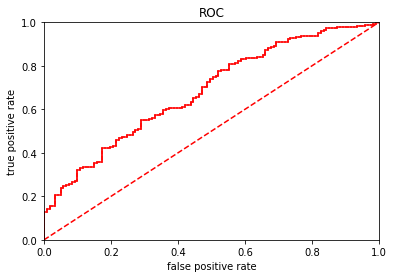

In [19]:
plotROC(agg.T, LabelArr)

___pycharm上的结果：___

the Area Under the Curve is: 0.8918191104095092

___为什么差这么多？？？___